# Relative Stock/Bond Performance

In [2]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data import COUNTRIES, get_all_data_and_labels
from indicators import *
from signal_math import *
from stats import *
from utils import *

plt.rcParams["figure.figsize"] = (10, 4)

# Initialize the data
all_data, all_labels = get_all_data_and_labels()
all_data_clean, all_labels_clean = get_all_data_and_labels(cleaned=True)

for i, label in enumerate(all_labels):
    vars()[label] = all_data[i]
    
for i, label in enumerate(all_labels_clean):
    vars()[label] = all_data_clean[i]
    
print(*all_labels, sep='\n')

# Get daily returns benchmark
bond_rets_daily = bond_rets_local_fx.pct_change()

bond_rets_local_fx
equity_prices
curr_acct_nom_usd
curr_acct_pct_gdp
fx_trd_wts_nom
fx_trd_wts_real
fx_vs_usd
fx_to_usd
gdp_nom
gdp_real
short_rates
long_rates
core_cpi_sa
m1_usd
m2_usd
m3_usd


Keep in mind what we are competing against:

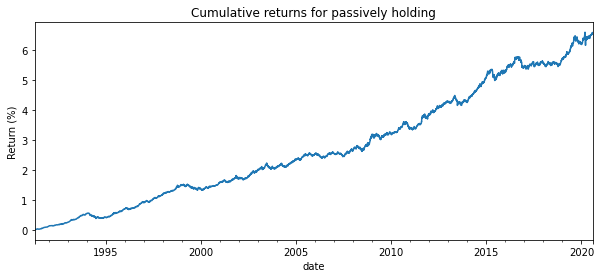

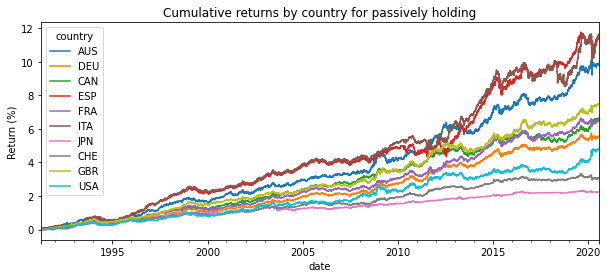

In [3]:
# Cumulative returns from holding
((1 + bond_rets_daily.dropna().mean(axis=1)).cumprod() - 1).plot(
    title='Cumulative returns for passively holding',
    ylabel='Return (%)'
)

((1 + bond_rets_daily.dropna()).cumprod() - 1).plot(
    title='Cumulative returns by country for passively holding',
    ylabel='Return (%)'
)

plt.show()

## Stock/Bond Performance Indicator

I faithfully implement the prospectus' component for relative stock/bond performance:

- Compute $\Delta_{1y} S = \text{1-year percent change in stocks}$ <br/><br/>

- Compute $\Delta_{1y} B = \text{1-year percent change in bonds}$ <br/><br/>

- Compute $\text{Spread} = \Delta_{1y} B - \Delta_{1y} S$. When the spread between bonds and stocks is negative and large, we hypothesize that investors will continue to seek the higher returns of stocks and persist that gap, decreasing (or at least not increasing) bond returns.<br/><br/>

- Compute the relative spread by subtracting the global average <br/><br/>

- Standardize that relative spread to each country's history of the indicator



Total cumulative return: 0.3024278200044441
Cumulative return by country: country
AUS    0.678198
CAN    0.793473
CHE    0.227422
DEU   -0.062489
ESP    0.801686
FRA   -0.196906
GBR    0.277647
ITA    0.353596
JPN   -0.255240
USA    0.857542
dtype: float64


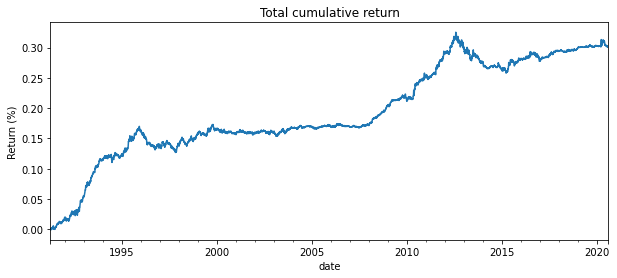

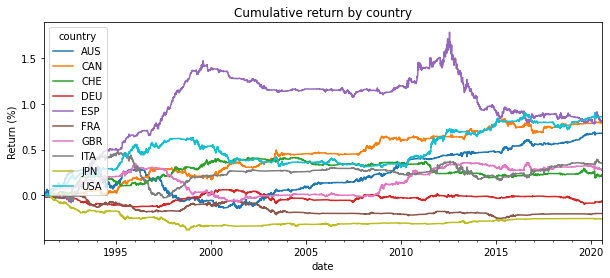

In [14]:
# Compute the signals (and indicators)
inds, sigs = test_indicator(
    stock_bond_performance_indicator,
    index=equity_prices.index,
    data=(equity_prices, bond_rets_local_fx)
)

# Calculate returns
total_rets, country_rets = calculate_returns(*make_comparable(sigs, bond_rets_daily))
print('Total cumulative return:', (1 + total_rets).product() - 1)
print('Cumulative return by country:', (1 + country_rets).product() - 1)

# Plot
((1 + total_rets).cumprod() - 1).plot(
    title='Total cumulative return',
    ylabel='Return (%)'
)
((1 + country_rets).cumprod() - 1).plot(
    title='Cumulative return by country',
    ylabel='Return (%)'
)

plt.show()